# Install and Import Dependencies

In [1]:
!pip install tensorflow 
!pip tensorflow-gpu
!pip opencv-python 
!pip matplotlib

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


ERROR: unknown command "tensorflow-gpu"

ERROR: unknown command "opencv-python"

ERROR: unknown command "matplotlib"



In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Load Model

In [3]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
interpreter.allocate_tensors()

# Make Detections

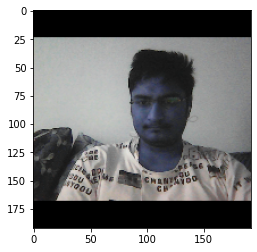

In [15]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [16]:
img = frame.copy()

In [17]:
img.shape

(480, 640, 3)

In [18]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[[[0.6842122  0.6523055  0.62652826]
   [0.61291254 0.73213667 0.53030443]
   [0.6132772  0.58492035 0.6969391 ]
   [0.6592566  0.818048   0.6911564 ]
   [0.648604   0.52083564 0.480177  ]
   [0.89370227 0.9549153  0.11640876]
   [0.8874278  0.38107643 0.113014  ]
   [0.971548   0.96885175 0.03290818]
   [0.9356532  0.3563438  0.00812574]
   [0.83704394 0.8093687  0.00516922]
   [0.85033345 0.52333295 0.00480377]
   [0.5904106  0.8840461  0.0143602 ]
   [0.5517231  0.41264957 0.00372951]
   [0.63178325 0.7698314  0.01967626]
   [0.8618709  0.18738316 0.0065862 ]
   [0.6549205  0.83748853 0.00699003]
   [0.8612522  0.20884222 0.00509679]]]]
[[[[0.6742057  0.6571477  0.65385455]
   [0.603325   0.73476976 0.4992818 ]
   [0.60526854 0.58773154 0.5892572 ]
   [0.6544726  0.824007   0.7180435 ]
   [0.64719844 0.5228754  0.4532124 ]
   [0.8933563  0.9529587  0.12707336]
   [0.89287484 0.3874862  0.12735116]
   [0.9703927  0.96790767 0.03549695]
   [0.939489   0.3566644  0.01037023]
   [0.993

[[[[0.67574894 0.6563835  0.68402886]
   [0.60434455 0.7347548  0.5175419 ]
   [0.60653746 0.58774376 0.6635456 ]
   [0.6565678  0.8236146  0.75546587]
   [0.65019757 0.52161056 0.55039215]
   [0.892939   0.9551424  0.15703583]
   [0.8933147  0.38306975 0.1682351 ]
   [0.9701345  0.9675054  0.03802038]
   [0.94139904 0.3386775  0.00968903]
   [0.84478086 1.0067888  0.02080078]
   [0.8538228  0.50546587 0.00423679]
   [0.5764893  0.91344106 0.0166079 ]
   [0.53480524 0.43706208 0.00854137]
   [0.9832078  0.9769926  0.00581376]
   [0.86408734 0.14498249 0.02694565]
   [0.65317255 0.8419577  0.0070423 ]
   [0.8481104  0.20688507 0.0096057 ]]]]
[[[[0.6704165  0.65679693 0.5897422 ]
   [0.6027012  0.73552275 0.52338564]
   [0.6003619  0.5890829  0.5547699 ]
   [0.6588028  0.826131   0.7123106 ]
   [0.6447193  0.51887774 0.64396393]
   [0.90802354 0.95994323 0.12651354]
   [0.89146674 0.36300468 0.16716333]
   [0.9705114  0.97009826 0.03053568]
   [0.9418905  0.31641263 0.01008949]
   [0.995

[[[[0.6743959  0.6584183  0.7022059 ]
   [0.60535973 0.7361282  0.519485  ]
   [0.6029755  0.5897543  0.4969763 ]
   [0.6559136  0.8228399  0.7575352 ]
   [0.6408976  0.521463   0.5888933 ]
   [0.8930056  0.9522028  0.1813503 ]
   [0.8930344  0.38567144 0.12860954]
   [0.9706013  0.9673788  0.03533076]
   [0.93829745 0.35902113 0.00996252]
   [0.83397686 0.81278276 0.00527979]
   [0.87489617 0.47139487 0.00492143]
   [0.57761395 0.9126046  0.01242444]
   [0.51964426 0.43850797 0.00828544]
   [0.9854955  0.9759542  0.00742646]
   [0.86798877 0.13837364 0.01558526]
   [0.65687525 0.8394699  0.00559354]
   [0.84178746 0.21698403 0.0053246 ]]]]
[[[[0.6779887  0.6607506  0.6732017 ]
   [0.6072562  0.7377653  0.6054121 ]
   [0.60602    0.5914872  0.6891867 ]
   [0.65382755 0.82415414 0.70374525]
   [0.6403531  0.5175692  0.6553117 ]
   [0.9000598  0.95669305 0.14816125]
   [0.8900248  0.36470935 0.19716865]
   [0.9714884  0.9670655  0.03806311]
   [0.9483969  0.34013146 0.01296234]
   [0.846

[[[[0.67360055 0.6587287  0.6833007 ]
   [0.6065558  0.7362951  0.4937334 ]
   [0.6045108  0.5896069  0.6036868 ]
   [0.65968895 0.8237059  0.7726897 ]
   [0.6495486  0.52109295 0.5259141 ]
   [0.9140522  0.9680512  0.19731009]
   [0.89350164 0.36558288 0.13085324]
   [0.96975493 0.9684848  0.03489793]
   [0.94082296 0.33979994 0.00894033]
   [0.9926063  0.9912121  0.02910014]
   [0.855977   0.50477314 0.00374542]
   [0.57666504 0.91407573 0.01791249]
   [0.53568244 0.43840098 0.00838041]
   [0.97703284 0.9759234  0.00521628]
   [0.8523023  0.18003222 0.01967587]
   [0.6439564  0.8540701  0.0059606 ]
   [0.84429467 0.20590727 0.00656311]]]]
[[[[0.6732282  0.66002977 0.66508293]
   [0.6026924  0.73953557 0.4394888 ]
   [0.60406244 0.59099454 0.5831941 ]
   [0.6549656  0.8283942  0.6976558 ]
   [0.64407057 0.5226154  0.5233681 ]
   [0.8947448  0.95623636 0.15198745]
   [0.8885783  0.36363977 0.17267928]
   [0.96990657 0.96734464 0.03556623]
   [0.94078386 0.31811064 0.01021879]
   [0.994

[[[[0.53662384 0.565463   0.6961781 ]
   [0.44625598 0.6433284  0.656258  ]
   [0.4503201  0.50490296 0.75142646]
   [0.4896177  0.7347807  0.6765636 ]
   [0.48872936 0.4587319  0.5381499 ]
   [0.7892995  0.9545022  0.22247162]
   [0.76801986 0.2441859  0.30223426]
   [0.9374025  0.98011315 0.0368796 ]
   [0.9615938  0.2181989  0.03159152]
   [0.7808351  0.7791342  0.02926534]
   [0.82526004 0.46582276 0.02427845]
   [0.9267943  0.9716045  0.01894509]
   [0.91521305 0.24083692 0.0171168 ]
   [0.8314893  0.97262096 0.03707334]
   [0.75443923 0.04244306 0.05499965]
   [0.68029135 0.1451011  0.02690361]
   [0.69056344 0.10129017 0.03289185]]]]
[[[[0.42663217 0.5846325  0.56057197]
   [0.3549628  0.66470206 0.40049577]
   [0.35102528 0.5248641  0.5355369 ]
   [0.40886176 0.7430599  0.38664004]
   [0.3813084  0.46649814 0.5756874 ]
   [0.6772201  0.8954642  0.21533367]
   [0.6356616  0.26732376 0.2773498 ]
   [0.7818696  0.9770524  0.10226262]
   [0.8602481  0.18336187 0.03237806]
   [0.641

[[[[0.46475136 0.5776738  0.5318081 ]
   [0.38385963 0.64871293 0.5334247 ]
   [0.38623175 0.5131131  0.6104267 ]
   [0.40133977 0.73387957 0.64915144]
   [0.40932858 0.45373458 0.68422186]
   [0.6728052  0.8961141  0.48524094]
   [0.6627009  0.283037   0.6883615 ]
   [0.8641491  0.97940886 0.1266417 ]
   [0.88558716 0.23583725 0.01237611]
   [0.7949971  0.9847739  0.05444485]
   [0.7365574  0.46224922 0.00381196]
   [1.0152855  0.8068017  0.00920429]
   [0.17040169 0.703937   0.03783631]
   [0.82231987 0.9529988  0.02260025]
   [0.6556674  0.26754117 0.00908584]
   [0.77264804 0.9704012  0.01265456]
   [0.55568594 0.12396453 0.01183028]]]]
[[[[0.44679064 0.59160984 0.7581831 ]
   [0.3622082  0.66383094 0.6649969 ]
   [0.3670562  0.53107524 0.78507227]
   [0.38443622 0.75166893 0.5802429 ]
   [0.38558078 0.46758568 0.65786266]
   [0.6517538  0.91968983 0.50656295]
   [0.6417581  0.29820105 0.42736349]
   [0.8526139  0.9792353  0.08915446]
   [0.8716018  0.2317183  0.03265561]
   [0.760

[[[[0.4864106  0.54073143 0.633912  ]
   [0.41563877 0.6135578  0.5744334 ]
   [0.41624996 0.48846146 0.6760352 ]
   [0.44853294 0.7017963  0.75918114]
   [0.44556484 0.44036326 0.55125684]
   [0.7025425  0.8884463  0.6339775 ]
   [0.69278425 0.26591972 0.6610831 ]
   [0.85866714 0.96899104 0.06761289]
   [0.57144964 0.0739823  0.18683983]
   [0.7236419  0.78208244 0.0091912 ]
   [0.5748658  0.12491985 0.08353464]
   [1.005719   0.8474355  0.00784651]
   [0.23487568 0.69680643 0.02655598]
   [0.81928676 0.96779764 0.02044698]
   [0.5806842  0.11674961 0.04426971]
   [0.5654263  0.15003824 0.02044604]
   [0.57562697 0.11928093 0.04472293]]]]
[[[[0.49180052 0.5453784  0.6564542 ]
   [0.42008775 0.6194546  0.6361139 ]
   [0.42439127 0.48945993 0.77378666]
   [0.46406183 0.7023951  0.7412153 ]
   [0.46994478 0.44043744 0.5327581 ]
   [0.7261182  0.9025411  0.47511715]
   [0.7316985  0.25418296 0.41488624]
   [0.84458846 0.9736023  0.08547022]
   [0.87736124 0.18024874 0.08549375]
   [0.809

[[[[0.49007142 0.54630387 0.63591933]
   [0.42525816 0.6155002  0.76428163]
   [0.42581218 0.49147648 0.740165  ]
   [0.4646932  0.7010888  0.74057555]
   [0.4637738  0.4402895  0.4727005 ]
   [0.7155367  0.88763034 0.52264297]
   [0.7080854  0.26708782 0.5503042 ]
   [0.85377467 0.97037613 0.03368333]
   [0.86555636 0.18183184 0.02729715]
   [0.7331287  0.7870364  0.01302541]
   [0.6473042  0.39393896 0.03797651]
   [1.0137676  0.849102   0.0074906 ]
   [1.0020568  0.31349325 0.00973993]
   [0.8234687  0.9650139  0.01214607]
   [0.5961229  0.08842747 0.0688704 ]
   [0.5917005  0.1475848  0.03601671]
   [0.6105187  0.20281872 0.02530315]]]]
[[[[0.48989174 0.5502311  0.6932721 ]
   [0.42417037 0.6205764  0.75015986]
   [0.426296   0.49300358 0.73705083]
   [0.46202642 0.7030506  0.70052457]
   [0.46383798 0.44004712 0.5960606 ]
   [0.71175516 0.89136547 0.69227767]
   [0.71323216 0.2729339  0.6587682 ]
   [0.85843223 0.9734694  0.08685073]
   [0.87971014 0.20542008 0.02439078]
   [0.729

[[[[0.49778983 0.55899376 0.43009973]
   [0.4287878  0.6285696  0.59074533]
   [0.42471755 0.50388753 0.81120336]
   [0.45365965 0.7118861  0.723948  ]
   [0.44768807 0.4460598  0.7180786 ]
   [0.7039552  0.89742553 0.66094387]
   [0.6863844  0.26306012 0.5263865 ]
   [0.86402094 0.9741296  0.06292117]
   [0.8763229  0.21536323 0.02824067]
   [0.77197903 0.8145546  0.01277226]
   [0.88305306 0.26196468 0.02657489]
   [1.0174412  0.84764624 0.01036438]
   [0.9998402  0.332949   0.0081271 ]
   [0.82205075 0.9279201  0.01015139]
   [0.58569515 0.11666467 0.05717579]
   [0.5759054  0.15606955 0.03303456]
   [0.58379954 0.12959954 0.02895901]]]]
[[[[0.49640006 0.554327   0.61208934]
   [0.4280816  0.6233787  0.72112864]
   [0.42828107 0.4996603  0.7159505 ]
   [0.45927835 0.71182793 0.622684  ]
   [0.454102   0.4467772  0.7115288 ]
   [0.71175236 0.902866   0.6488833 ]
   [0.69717526 0.2731459  0.64575547]
   [0.8620758  0.9744613  0.06207585]
   [0.94218636 0.18409938 0.05078774]
   [0.769

[[[[0.49350464 0.55340326 0.7571339 ]
   [0.42302918 0.6250777  0.58806753]
   [0.4214128  0.5010321  0.664536  ]
   [0.45254707 0.71478987 0.762617  ]
   [0.4507587  0.45029944 0.70191634]
   [0.6976292  0.9016881  0.65266705]
   [0.6930997  0.2810964  0.5187361 ]
   [0.8624538  0.9775102  0.06964704]
   [0.86059237 0.23788369 0.0139172 ]
   [0.7397864  0.82963985 0.01124278]
   [0.5008636  0.48086688 0.04559276]
   [1.0139349  0.8473952  0.01134488]
   [0.25516576 0.69382787 0.01884996]
   [0.82042444 0.927953   0.00994182]
   [0.6656727  0.30731732 0.00752735]
   [0.56537163 0.1400909  0.01547917]
   [0.59976524 0.20739505 0.01193761]]]]
[[[[0.49350464 0.55340326 0.7571339 ]
   [0.42302918 0.6250777  0.58806753]
   [0.4214128  0.5010321  0.664536  ]
   [0.45254707 0.71478987 0.762617  ]
   [0.4507587  0.45029944 0.70191634]
   [0.6976292  0.9016881  0.65266705]
   [0.6930997  0.2810964  0.5187361 ]
   [0.8624538  0.9775102  0.06964704]
   [0.86059237 0.23788369 0.0139172 ]
   [0.739

[[[[0.4890636  0.5581869  0.75437796]
   [0.42135307 0.6280851  0.6005949 ]
   [0.4185003  0.50513124 0.66066456]
   [0.4533736  0.7160357  0.76785487]
   [0.44794226 0.45182377 0.6665807 ]
   [0.7022149  0.90566844 0.602736  ]
   [0.68360245 0.27639717 0.69797164]
   [0.8568117  0.97561705 0.03918779]
   [0.86387765 0.21282355 0.02337095]
   [0.76061624 0.8109255  0.01486264]
   [0.6237018  0.43519396 0.02727625]
   [1.01599    0.8465092  0.01243133]
   [0.25376415 0.69399023 0.02259518]
   [0.82661504 0.88715875 0.00808265]
   [0.6445437  0.32637668 0.01392923]
   [0.45610726 0.7452364  0.01155399]
   [0.595287   0.20626251 0.01529899]]]]
[[[[0.49172527 0.5550504  0.7704522 ]
   [0.42296004 0.62685066 0.5902877 ]
   [0.42123148 0.5028846  0.7251152 ]
   [0.45002913 0.7158038  0.808362  ]
   [0.4474311  0.4497447  0.73483336]
   [0.7058171  0.907078   0.6229099 ]
   [0.6890297  0.28452945 0.5453764 ]
   [0.8664813  0.97367    0.0533478 ]
   [0.8616058  0.22897857 0.01043686]
   [0.734

In [ ]:
right_eye = keypoints_with_scores[0][0][2]
left_elbow = keypoints_with_scores[0][0][7]

In [19]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [20]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

236 355 0.7704522013664246
203 401 0.5902876853942871
202 321 0.725115180015564
216 458 0.8083620071411133
214 287 0.7348333597183228
338 580 0.6229099035263062
330 182 0.5453764200210571
415 623 0.05334779620170593
413 146 0.01043686456978321
352 501 0.010306608863174915
305 276 0.0287034809589386
119 469 0.021404067054390907
121 445 0.02554025873541832
342 617 0.023244583979249
277 90 0.03831145912408829
271 104 0.018909865990281105
275 87 0.023274673148989677


# 3. Draw Keypoints

In [21]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

# 4. Draw Edges

In [8]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [22]:
shaped[0], shaped[1]


(array([236.02812767, 355.23223877,   0.7704522 ]),
 array([203.02082062, 401.18442535,   0.59028769]))

In [23]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(401, 203)
(321, 202)
(458, 216)
(287, 214)
(580, 338)
(182, 330)
(623, 415)
(501, 352)
(146, 413)
(276, 305)
(182, 330)
(469, 119)
(445, 121)
(445, 121)
(617, 342)
(104, 271)
(90, 277)
(87, 275)


In [6]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,25), 2)